# **TUGAS BESAR BIOINFORMATIKA**

## **Klasifikasi Bioaktivitas Fibroblast Growth Factor Receptor (FGFR) Menggunakan Metode Lazy Classifier dan Random Forest**

## **Dataset FGFR**
**Kelompok 6**

- Veni Zahara Kartika
- Khairunnisa Rifda Aulia
- Rahmi Agustin, Alayka Nazwa
- Rizka Yustiana Zahra
- Sylviani Prima Astuti Ananda


## **01 - Prep Environtment**

#### **1.1 Instalasi**

In [ ]:
! pip install chembl_webresource_client
! pip install lazypredict
! pip install jcopml==1.1.1
! pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.9 MB/s eta 0:00:00
  Created wheel for jcopml: filename=jcopml-1.1.1-py2.py3-none-any.whl size=27509 sha256=85d942fbfc3cabf50ca4be72c50d1bc0084866e8b7a137a0503ea0bcee737c77
  Stored in directory: /root/.cache/pip/wheels/79/3f/d2/72357060b29488def73bceb49f653ca88a60a3ddac63cf7780
Successfully built jcopml
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 35.3 MB/s eta 0:00:00


#### **1.2 Import Library**

In [ ]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client
#from jcopml.plot import plot_missing_value

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import display
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Descriptors, Lipinski

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import lazypredict
from lazypredict.Supervised import LazyRegressor, LazyClassifier

from tqdm import tqdm

#from jcopml.pipeline import num_pipe, cat_pipe
#from jcopml.utils import save_model, load_model
#from jcopml.plot import plot_missing_value
#from jcopml.feature_importance import mean_score_decrease

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


#### **1.3 Database Berdasarkan Kata Kunci Reseptor/Target**

In [ ]:
target = new_client.target
target_query = target.search('FGFR kinase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Mus musculus,Fibroblast growth factor receptor 4,18.00,False,CHEMBL3839,"[{'accession': 'Q03142', 'component_descriptio...",SINGLE PROTEIN,10090
1,[],Mus musculus,Fibroblast growth factor receptor,15.00,False,CHEMBL2111391,"[{'accession': 'P21803', 'component_descriptio...",PROTEIN FAMILY,10090
2,[],Homo sapiens,Fibroblast growth factor receptor,14.00,False,CHEMBL2095217,"[{'accession': 'P22607', 'component_descriptio...",PROTEIN FAMILY,9606
3,[],Homo sapiens,Fibroblast growth factor receptor substrate 2,14.00,False,CHEMBL5291586,"[{'accession': 'Q8WU20', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Homo sapiens,Fibroblast growth factor receptor 3,13.00,False,CHEMBL2742,"[{'accession': 'P22607', 'component_descriptio...",SINGLE PROTEIN,9606
...,...,...,...,...,...,...,...,...,...
1555,[],Homo sapiens,mTOR/FKBP12A/FKBP12B,2.00,False,CHEMBL4296662,"[{'accession': 'P62942', 'component_descriptio...",PROTEIN COMPLEX,9606
1556,[],Rattus norvegicus,TGF-beta receptor type-1,2.00,False,CHEMBL4523265,"[{'accession': 'P80204', 'component_descriptio...",SINGLE PROTEIN,10116
1557,[],Homo sapiens,RNA cytosine C(5)-methyltransferase NSUN2,2.00,False,CHEMBL4739683,"[{'accession': 'Q08J23', 'component_descriptio...",SINGLE PROTEIN,9606
1558,[],Homo sapiens,VHL/Protein arginine N-methyltransferase 5,2.00,False,CHEMBL4748215,"[{'accession': 'O14744', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606


#### **1.4 Filter berdasarkan IC50**

In [ ]:
def get_ic50_data(targets, new_client, max_ids=30):
    all_data = []
    limited_targets = targets.head(max_ids)  # Ambil max_ids pertama
    for x in range(len(limited_targets)):
        selected_target = limited_targets.target_chembl_id[x]
        activity = new_client.activity
        res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
        df = pd.DataFrame.from_dict(res)
        all_data.append(df)
    combined_df = pd.concat(all_data, ignore_index=True)
    return combined_df

In [ ]:
df = get_ic50_data(targets, new_client, max_ids=30)

In [ ]:
df.isna().sum()

,0
action_type,12919
activity_comment,12647
activity_id,0
activity_properties,0
assay_chembl_id,0
assay_description,0
assay_type,0
assay_variant_accession,14426
assay_variant_mutation,14426
bao_endpoint,0


In [ ]:
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,10905869,[],CHEMBL2038870,Inhibition of Tel-fused FGFR4 in mouse BA/F3 c...,B,None,None,BAO_0000190,...,Mus musculus,Fibroblast growth factor receptor 4,10090,None,None,IC50,uM,UO_0000065,None,7.0
1,None,None,10905907,[],CHEMBL2038870,Inhibition of Tel-fused FGFR4 in mouse BA/F3 c...,B,None,None,BAO_0000190,...,Mus musculus,Fibroblast growth factor receptor 4,10090,None,None,IC50,uM,UO_0000065,None,1.9
2,None,None,10905954,[],CHEMBL2038870,Inhibition of Tel-fused FGFR4 in mouse BA/F3 c...,B,None,None,BAO_0000190,...,Mus musculus,Fibroblast growth factor receptor 4,10090,None,None,IC50,uM,UO_0000065,None,10.0
3,None,None,10906065,[],CHEMBL2038870,Inhibition of Tel-fused FGFR4 in mouse BA/F3 c...,B,None,None,BAO_0000190,...,Mus musculus,Fibroblast growth factor receptor 4,10090,None,None,IC50,uM,UO_0000065,None,7.0
4,None,None,10906973,[],CHEMBL2038870,Inhibition of Tel-fused FGFR4 in mouse BA/F3 c...,B,None,None,BAO_0000190,...,Mus musculus,Fibroblast growth factor receptor 4,10090,None,None,IC50,uM,UO_0000065,None,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14611,None,Active,4909624,[],CHEMBL1614062,PUBCHEM_BIOASSAY: Fluorescence-based biochemic...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine protein phosphatase PP1-alpha...,9606,None,None,IC50,um,UO_0000065,None,3.697
14612,None,Active,4909625,[],CHEMBL1614062,PUBCHEM_BIOASSAY: Fluorescence-based biochemic...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine protein phosphatase PP1-alpha...,9606,None,None,IC50,um,UO_0000065,None,8.127
14613,None,Active,4909626,[],CHEMBL1614062,PUBCHEM_BIOASSAY: Fluorescence-based biochemic...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine protein phosphatase PP1-alpha...,9606,None,None,IC50,um,UO_0000065,None,6.947
14614,None,Active,4909627,[],CHEMBL1614062,PUBCHEM_BIOASSAY: Fluorescence-based biochemic...,B,None,None,BAO_0000190,...,Homo sapiens,Serine/threonine protein phosphatase PP1-alpha...,9606,None,None,IC50,um,UO_0000065,None,6.958


In [ ]:
df.to_csv('01_dataset_FGFR.csv', index=False)

#### **1.5 Preprocessing**


##### - **Menghapus Data Hilang dan Duplikat**

In [ ]:
df_value = df[df.standard_value.notna()]
df_smile = df_value[df_value.canonical_smiles.notna()]
df_nr = df_smile.drop_duplicates(['canonical_smiles'])

In [ ]:
df_nr.isna().sum()

,0
action_type,5595
activity_comment,5110
activity_id,0
activity_properties,0
assay_chembl_id,0
assay_description,0
assay_type,0
assay_variant_accession,6264
assay_variant_mutation,6264
bao_endpoint,0


##### - **Menyeleksi 3 Kolom**

In [ ]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df_prep = df_nr[selection]

In [ ]:
df_prep

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL2037226,Cc1ccc(NC(=O)Nc2cc(C(F)(F)F)ccc2F)cc1Nc1ccc2c(...,7000.0
1,CHEMBL2037224,O=C(Nc1cccc(Nc2ccc3c(c2)NC(=O)/C3=C\c2ccc[nH]2...,1900.0
2,CHEMBL2037220,CN1CCN(c2cc(C(=O)Nc3cccc(Nc4ccc5c(c4)NC(=O)/C5...,10000.0
3,CHEMBL2037209,Cc1cn(-c2cc(C(=O)Nc3cccc(Nc4ccc5c(c4)NC(=O)/C5...,7000.0
4,CHEMBL2037208,O=C1Nc2cc(Nc3cccc(NC(=O)c4cccc(C(F)(F)F)c4)c3)...,5400.0
...,...,...,...
14611,CHEMBL1470871,O=C(O)C1C2CCC(O2)C1C(=O)NC1CCCCC1,3697.0
14612,CHEMBL1470891,O=C(O)c1cc(-c2ccc(Cl)c(Cl)c2)n(-c2ccc(F)cc2)n1,8127.0
14613,CHEMBL1471716,COc1cnc(-c2ccccn2)nc1Sc1ccc(C)cc1,6947.0
14614,CHEMBL1353885,CCOC(=O)c1cnc(-n2nc(C)cc2C)nc1NCCc1ccccc1,6958.0


In [ ]:
df_prep.isna().sum()

,0
molecule_chembl_id,0
canonical_smiles,0
standard_value,0


In [ ]:
df_prep.to_csv('00_dataset_prep_FGFR.csv', index=False)

##### - **Memberi Label pada Data**

In [ ]:
df_prep_label = pd.read_csv('00_dataset_prep_FGFR.csv')

In [ ]:
bioactivity_threshold = []
for i in df_prep_label.standard_value:
    if float(i) >= 10000:
        bioactivity_threshold.append("inactive")
    elif float(i) <= 1000:
        bioactivity_threshold.append("active")
    else:
        bioactivity_threshold.append("intermediate")

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')

In [ ]:
bioactivity_class = pd.DataFrame(bioactivity_class)
bioactivity_class

,class
0,intermediate
1,intermediate
2,inactive
3,intermediate
4,intermediate
...,...
6283,intermediate
6284,intermediate
6285,intermediate
6286,intermediate


In [ ]:
df_label = pd.concat([df_prep_label, bioactivity_class],axis=1)
df_label.isna().sum()

,0
molecule_chembl_id,0
canonical_smiles,0
standard_value,0
class,0


##### - **Export dataset**

In [ ]:
df_label.to_csv('01_label_FGFR.csv', index=False)

In [ ]:
! zip '01_prep_FGFR.csv'.zip *.csv

  adding: 00_dataset_prep_FGFR.csv (deflated 81%)
  adding: 01_dataset_FGFR.csv (deflated 93%)
  adding: 01_label_FGFR.csv (deflated 82%)


##### - **Transform SMILES menjadi LIST**

In [ ]:
df_eda = pd.read_csv('01_label_FGFR.csv')
df_eda

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2037226,Cc1ccc(NC(=O)Nc2cc(C(F)(F)F)ccc2F)cc1Nc1ccc2c(...,7000.00,intermediate
1,CHEMBL2037224,O=C(Nc1cccc(Nc2ccc3c(c2)NC(=O)/C3=C\c2ccc[nH]2...,1900.00,intermediate
2,CHEMBL2037220,CN1CCN(c2cc(C(=O)Nc3cccc(Nc4ccc5c(c4)NC(=O)/C5...,10000.00,inactive
3,CHEMBL2037209,Cc1cn(-c2cc(C(=O)Nc3cccc(Nc4ccc5c(c4)NC(=O)/C5...,7000.00,intermediate
4,CHEMBL2037208,O=C1Nc2cc(Nc3cccc(NC(=O)c4cccc(C(F)(F)F)c4)c3)...,5400.00,intermediate
...,...,...,...,...
6283,CHEMBL1470871,O=C(O)C1C2CCC(O2)C1C(=O)NC1CCCCC1,3697.00,intermediate
6284,CHEMBL1470891,O=C(O)c1cc(-c2ccc(Cl)c(Cl)c2)n(-c2ccc(F)cc2)n1,8127.00,intermediate
6285,CHEMBL1471716,COc1cnc(-c2ccccn2)nc1Sc1ccc(C)cc1,6947.00,intermediate
6286,CHEMBL1353885,CCOC(=O)c1cnc(-n2nc(C)cc2C)nc1NCCc1ccccc1,6958.00,intermediate


In [ ]:
df_eda = df_label
df_eda

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2037226,Cc1ccc(NC(=O)Nc2cc(C(F)(F)F)ccc2F)cc1Nc1ccc2c(...,7000.00,intermediate
1,CHEMBL2037224,O=C(Nc1cccc(Nc2ccc3c(c2)NC(=O)/C3=C\c2ccc[nH]2...,1900.00,intermediate
2,CHEMBL2037220,CN1CCN(c2cc(C(=O)Nc3cccc(Nc4ccc5c(c4)NC(=O)/C5...,10000.00,inactive
3,CHEMBL2037209,Cc1cn(-c2cc(C(=O)Nc3cccc(Nc4ccc5c(c4)NC(=O)/C5...,7000.00,intermediate
4,CHEMBL2037208,O=C1Nc2cc(Nc3cccc(NC(=O)c4cccc(C(F)(F)F)c4)c3)...,5400.00,intermediate
...,...,...,...,...
6283,CHEMBL1470871,O=C(O)C1C2CCC(O2)C1C(=O)NC1CCCCC1,3697.00,intermediate
6284,CHEMBL1470891,O=C(O)c1cc(-c2ccc(Cl)c(Cl)c2)n(-c2ccc(F)cc2)n1,8127.00,intermediate
6285,CHEMBL1471716,COc1cnc(-c2ccccn2)nc1Sc1ccc(C)cc1,6947.00,intermediate
6286,CHEMBL1353885,CCOC(=O)c1cnc(-n2nc(C)cc2C)nc1NCCc1ccccc1,6958.00,intermediate


In [ ]:
df_no_smiles = df_eda.drop(columns='canonical_smiles')
df_no_smiles

,molecule_chembl_id,standard_value,class
0,CHEMBL2037226,7000.00,intermediate
1,CHEMBL2037224,1900.00,intermediate
2,CHEMBL2037220,10000.00,inactive
3,CHEMBL2037209,7000.00,intermediate
4,CHEMBL2037208,5400.00,intermediate
...,...,...,...
6283,CHEMBL1470871,3697.00,intermediate
6284,CHEMBL1470891,8127.00,intermediate
6285,CHEMBL1471716,6947.00,intermediate
6286,CHEMBL1353885,6958.00,intermediate


In [ ]:
smiles = []

for i in df_eda.canonical_smiles.tolist():
    cpd = str(i).split('.')
    cpd_longest = max(cpd, key = len)
    smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL2037226,7000.00,intermediate,Cc1ccc(NC(=O)Nc2cc(C(F)(F)F)ccc2F)cc1Nc1ccc2c(...
1,CHEMBL2037224,1900.00,intermediate,O=C(Nc1cccc(Nc2ccc3c(c2)NC(=O)/C3=C\c2ccc[nH]2...
2,CHEMBL2037220,10000.00,inactive,CN1CCN(c2cc(C(=O)Nc3cccc(Nc4ccc5c(c4)NC(=O)/C5...
3,CHEMBL2037209,7000.00,intermediate,Cc1cn(-c2cc(C(=O)Nc3cccc(Nc4ccc5c(c4)NC(=O)/C5...
4,CHEMBL2037208,5400.00,intermediate,O=C1Nc2cc(Nc3cccc(NC(=O)c4cccc(C(F)(F)F)c4)c3)...
...,...,...,...,...
6283,CHEMBL1470871,3697.00,intermediate,O=C(O)C1C2CCC(O2)C1C(=O)NC1CCCCC1
6284,CHEMBL1470891,8127.00,intermediate,O=C(O)c1cc(-c2ccc(Cl)c(Cl)c2)n(-c2ccc(F)cc2)n1
6285,CHEMBL1471716,6947.00,intermediate,COc1cnc(-c2ccccn2)nc1Sc1ccc(C)cc1
6286,CHEMBL1353885,6958.00,intermediate,CCOC(=O)c1cnc(-n2nc(C)cc2C)nc1NCCc1ccccc1


In [ ]:
df_clean_smiles.isna().sum()

,0
molecule_chembl_id,0
standard_value,0
class,0
canonical_smiles,0


##### - **Menghitung Lipinski Deskriptor**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,535.50,7.36,5.00,3.00
1,503.48,6.91,5.00,3.00
2,630.63,5.97,5.00,6.00
3,568.56,7.02,4.00,5.00
4,488.47,6.52,4.00,3.00
...,...,...,...,...
6283,267.32,1.31,2.00,3.00
6284,351.16,4.68,1.00,3.00
6285,309.39,4.01,0.00,5.00
6286,365.44,3.11,1.00,7.00


##### - **Menggabungkan Dataset dengan Deskriptor Lipinski**

In [ ]:
df_combined = pd.concat([df_clean_smiles,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2037226,7000.00,intermediate,Cc1ccc(NC(=O)Nc2cc(C(F)(F)F)ccc2F)cc1Nc1ccc2c(...,535.50,7.36,5.00,3.00
1,CHEMBL2037224,1900.00,intermediate,O=C(Nc1cccc(Nc2ccc3c(c2)NC(=O)/C3=C\c2ccc[nH]2...,503.48,6.91,5.00,3.00
2,CHEMBL2037220,10000.00,inactive,CN1CCN(c2cc(C(=O)Nc3cccc(Nc4ccc5c(c4)NC(=O)/C5...,630.63,5.97,5.00,6.00
3,CHEMBL2037209,7000.00,intermediate,Cc1cn(-c2cc(C(=O)Nc3cccc(Nc4ccc5c(c4)NC(=O)/C5...,568.56,7.02,4.00,5.00
4,CHEMBL2037208,5400.00,intermediate,O=C1Nc2cc(Nc3cccc(NC(=O)c4cccc(C(F)(F)F)c4)c3)...,488.47,6.52,4.00,3.00
...,...,...,...,...,...,...,...,...
6283,CHEMBL1470871,3697.00,intermediate,O=C(O)C1C2CCC(O2)C1C(=O)NC1CCCCC1,267.32,1.31,2.00,3.00
6284,CHEMBL1470891,8127.00,intermediate,O=C(O)c1cc(-c2ccc(Cl)c(Cl)c2)n(-c2ccc(F)cc2)n1,351.16,4.68,1.00,3.00
6285,CHEMBL1471716,6947.00,intermediate,COc1cnc(-c2ccccn2)nc1Sc1ccc(C)cc1,309.39,4.01,0.00,5.00
6286,CHEMBL1353885,6958.00,intermediate,CCOC(=O)c1cnc(-n2nc(C)cc2C)nc1NCCc1ccccc1,365.44,3.11,1.00,7.00


In [ ]:
df_combined.isna().sum()

,0
molecule_chembl_id,0
standard_value,0
class,0
canonical_smiles,0
MW,0
LogP,0
NumHDonors,0
NumHAcceptors,0


In [ ]:
df_combined.to_csv('df_combined.csv', index=False)

##### - **Konversi IC50 menjadi pIC50**

In [ ]:
df_combined = pd.read_csv('df_combined.csv')
df_combined.head(10)

,molecule_chembl_id,standard_value,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2037226,7000.00,intermediate,Cc1ccc(NC(=O)Nc2cc(C(F)(F)F)ccc2F)cc1Nc1ccc2c(...,535.50,7.36,5.00,3.00
1,CHEMBL2037224,1900.00,intermediate,O=C(Nc1cccc(Nc2ccc3c(c2)NC(=O)/C3=C\c2ccc[nH]2...,503.48,6.91,5.00,3.00
2,CHEMBL2037220,10000.00,inactive,CN1CCN(c2cc(C(=O)Nc3cccc(Nc4ccc5c(c4)NC(=O)/C5...,630.63,5.97,5.00,6.00
3,CHEMBL2037209,7000.00,intermediate,Cc1cn(-c2cc(C(=O)Nc3cccc(Nc4ccc5c(c4)NC(=O)/C5...,568.56,7.02,4.00,5.00
4,CHEMBL2037208,5400.00,intermediate,O=C1Nc2cc(Nc3cccc(NC(=O)c4cccc(C(F)(F)F)c4)c3)...,488.47,6.52,4.00,3.00
5,CHEMBL3908044,18.00,active,COCCOc1cc(NC(=O)N2CCCc3ccc(C=O)nc32)ncc1C#N,381.39,2.17,1.00,7.00
6,CHEMBL3954670,211.00,active,CN(C)CCOc1cc(NC(=O)N2CCCc3ccc(C=O)nc32)ncc1C#N,394.44,2.09,1.00,7.00
7,CHEMBL4277111,3000.00,intermediate,O=Cc1ccc2cccc(C(=O)Nc3ccc(C(F)(F)F)cn3)c2n1,345.28,3.71,1.00,4.00
8,CHEMBL4284069,4.90,active,C=CC(=O)Nc1ccccc1C(=O)Nc1cc(CCc2cc(OC)cc(OC)c2...,420.47,3.59,3.00,5.00
9,CHEMBL3828009,76.00,active,C[C@@H](Oc1ccc2[nH]nc(/C=C/c3cnn(CCO)c3)c2c1)c...,444.32,4.76,2.00,6.00


In [ ]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i * (10**-9)  # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)  # Perbaikan di sini

    return x

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)  # Perbaikan di sini

    return x

In [ ]:
df_norm = norm_value(df_combined)
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2037226,intermediate,Cc1ccc(NC(=O)Nc2cc(C(F)(F)F)ccc2F)cc1Nc1ccc2c(...,535.50,7.36,5.00,3.00,5.15
1,CHEMBL2037224,intermediate,O=C(Nc1cccc(Nc2ccc3c(c2)NC(=O)/C3=C\c2ccc[nH]2...,503.48,6.91,5.00,3.00,5.72
2,CHEMBL2037220,inactive,CN1CCN(c2cc(C(=O)Nc3cccc(Nc4ccc5c(c4)NC(=O)/C5...,630.63,5.97,5.00,6.00,5.00
3,CHEMBL2037209,intermediate,Cc1cn(-c2cc(C(=O)Nc3cccc(Nc4ccc5c(c4)NC(=O)/C5...,568.56,7.02,4.00,5.00,5.15
4,CHEMBL2037208,intermediate,O=C1Nc2cc(Nc3cccc(NC(=O)c4cccc(C(F)(F)F)c4)c3)...,488.47,6.52,4.00,3.00,5.27
...,...,...,...,...,...,...,...,...
6283,CHEMBL1470871,intermediate,O=C(O)C1C2CCC(O2)C1C(=O)NC1CCCCC1,267.32,1.31,2.00,3.00,5.43
6284,CHEMBL1470891,intermediate,O=C(O)c1cc(-c2ccc(Cl)c(Cl)c2)n(-c2ccc(F)cc2)n1,351.16,4.68,1.00,3.00,5.09
6285,CHEMBL1471716,intermediate,COc1cnc(-c2ccccn2)nc1Sc1ccc(C)cc1,309.39,4.01,0.00,5.00,5.16
6286,CHEMBL1353885,intermediate,CCOC(=O)c1cnc(-n2nc(C)cc2C)nc1NCCc1ccccc1,365.44,3.11,1.00,7.00,5.16


##### - **Menghapus Kelas 'intermediet class'**

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL2037220,inactive,CN1CCN(c2cc(C(=O)Nc3cccc(Nc4ccc5c(c4)NC(=O)/C5...,630.63,5.97,5.00,6.00,5.00
5,CHEMBL3908044,active,COCCOc1cc(NC(=O)N2CCCc3ccc(C=O)nc32)ncc1C#N,381.39,2.17,1.00,7.00,7.74
6,CHEMBL3954670,active,CN(C)CCOc1cc(NC(=O)N2CCCc3ccc(C=O)nc32)ncc1C#N,394.44,2.09,1.00,7.00,6.68
8,CHEMBL4284069,active,C=CC(=O)Nc1ccccc1C(=O)Nc1cc(CCc2cc(OC)cc(OC)c2...,420.47,3.59,3.00,5.00,8.31
9,CHEMBL3828009,active,C[C@@H](Oc1ccc2[nH]nc(/C=C/c3cnn(CCO)c3)c2c1)c...,444.32,4.76,2.00,6.00,7.12
...,...,...,...,...,...,...,...,...
6251,CHEMBL1464193,inactive,N#Cc1c(N2CCCC(O)C2)nc(N)c2c(N)nc3c(c12)CC(=O)N...,473.58,2.48,3.00,8.00,4.17
6252,CHEMBL171632,inactive,CC1(C)C=C2C(=NN(c3ccccc3)C(N)=C2C#N)CO1,280.33,2.29,1.00,5.00,4.25
6267,CHEMBL1466929,inactive,CCOC(=O)c1sc(N2C(=O)C(O)=C(C(=O)c3ccco3)C2c2cc...,483.46,3.91,1.00,10.00,4.93
6274,CHEMBL1350237,inactive,COc1ccc(CN2C(=O)Cc3c2nc(N)c2c(N)nc(N4CCCCC4)c(...,443.51,2.75,2.00,8.00,4.96


In [ ]:
df_2class.isna().sum()

,0
molecule_chembl_id,0
class,0
canonical_smiles,0
MW,0
LogP,0
NumHDonors,0
NumHAcceptors,0
pIC50,0


In [ ]:
df_2class = df_2class.dropna(subset=['pIC50'])

In [ ]:
print(df_2class[['MW', 'LogP', 'pIC50']].describe())    # Cek nilai tak terhingga

           MW    LogP   pIC50
count 5246.00 5246.00 5246.00
mean   441.54    3.89    6.58
std     99.75    1.37    1.61
min     71.08   -1.52    1.19
25%    377.91    2.95    5.00
50%    450.76    3.90    6.83
75%    506.67    4.78    7.91
max    853.92    9.77   10.52


In [ ]:
df_2class = df_2class[np.isfinite(df_2class['pIC50'])]

In [ ]:
print(df_2class[['MW', 'LogP', 'pIC50']].describe())

           MW    LogP   pIC50
count 5246.00 5246.00 5246.00
mean   441.54    3.89    6.58
std     99.75    1.37    1.61
min     71.08   -1.52    1.19
25%    377.91    2.95    5.00
50%    450.76    3.90    6.83
75%    506.67    4.78    7.91
max    853.92    9.77   10.52


In [ ]:
df_2class.to_csv('01_label2class_FGFR.csv', index=False)

#### **1.6 Plotting**

##### - **Plot Frekuensi dari Dua Kelas Bioaktifitas**

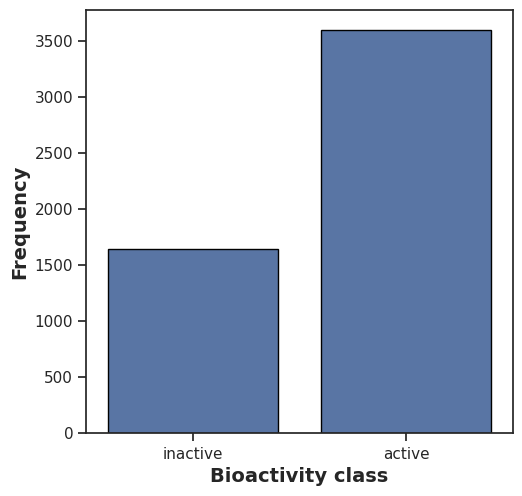

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

##### - **Scatter Plot MW vs LogP**

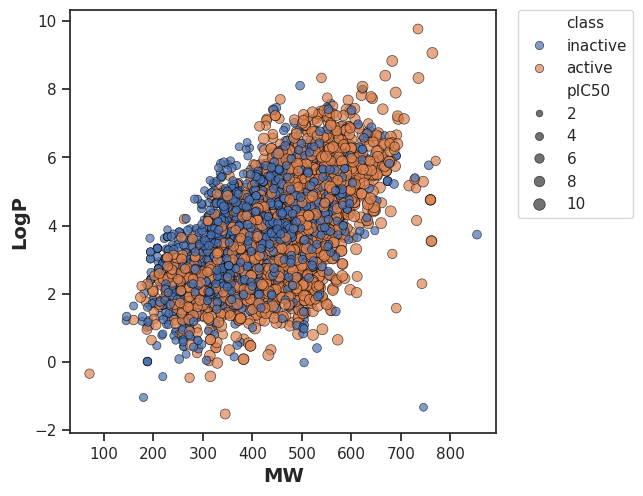

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

##### - **pIC50 Value Boxplots**

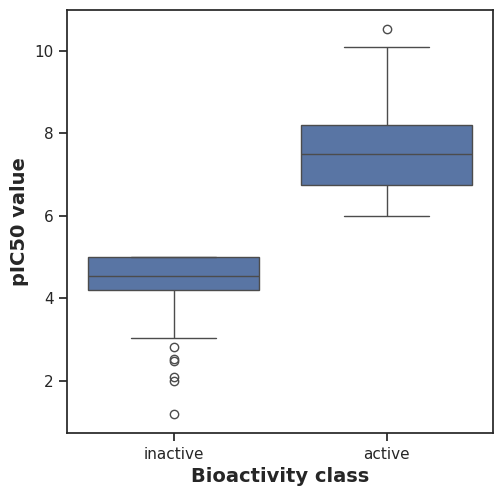

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

#### **1.7 Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,5923645.00,0.00,0.05,Different distribution (reject H0)


##### - **MW**

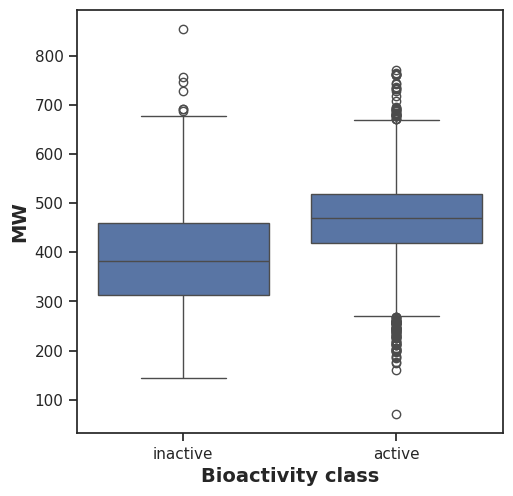

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,4290192.50,0.00,0.05,Different distribution (reject H0)


##### - **LogP**

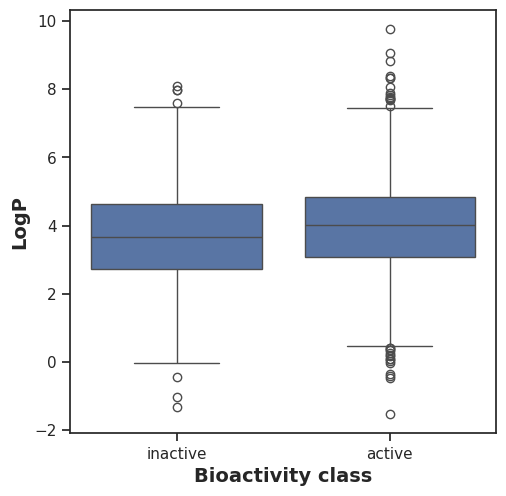

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3364837.00,0.00,0.05,Different distribution (reject H0)


##### - **NumHDonors**

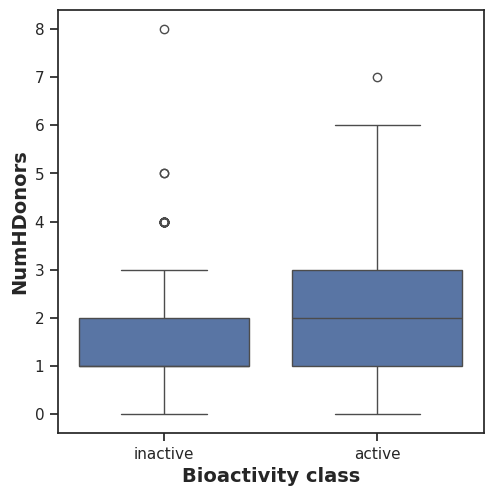

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3984411.50,0.00,0.05,Different distribution (reject H0)


##### - **NumHAcceptors**

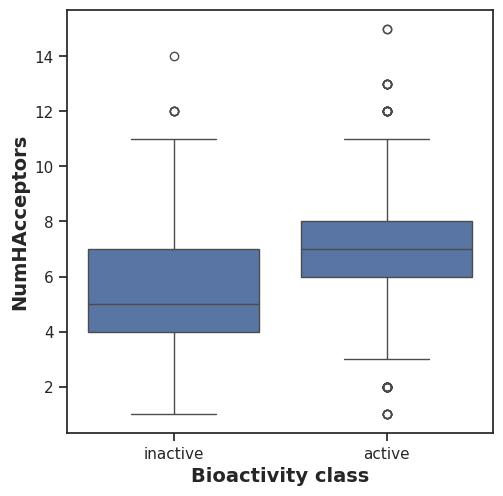

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,4135665.50,0.00,0.05,Different distribution (reject H0)


## **02 - Fingerprint Generation**

#### **2.1 Padel Descriptor**

In [ ]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
! unzip padel.zip

--2024-12-25 15:50:00--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-12-25 15:50:00--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   147MB/s    in 0.2s    

2024-12-25 15:50:01 (147 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-12-25 15:50:01--  https://github

In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df_2class[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [ ]:
! cat molecule.smi | head -5

CN1CCN(c2cc(C(=O)Nc3cccc(Nc4ccc5c(c4)NC(=O)/C5=C\c4cc(C(=O)O)c[nH]4)c3)cc(C(F)(F)F)c2)CC1	CHEMBL2037220
COCCOc1cc(NC(=O)N2CCCc3ccc(C=O)nc32)ncc1C#N	CHEMBL3908044
CN(C)CCOc1cc(NC(=O)N2CCCc3ccc(C=O)nc32)ncc1C#N	CHEMBL3954670
C=CC(=O)Nc1ccccc1C(=O)Nc1cc(CCc2cc(OC)cc(OC)c2)[nH]n1	CHEMBL4284069
C[C@@H](Oc1ccc2[nH]nc(/C=C/c3cnn(CCO)c3)c2c1)c1c(Cl)cncc1Cl	CHEMBL3828009


In [ ]:
! cat molecule.smi | wc -l

5246


In [ ]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [ ]:
! bash padel.sh

Streaming output truncated to the last 5000 lines.
Processing CHEMBL2148053 in molecule.smi (248/5246). Average speed: 0.34 s/mol.
Processing CHEMBL2204532 in molecule.smi (249/5246). Average speed: 0.34 s/mol.
Processing CHEMBL2216830 in molecule.smi (250/5246). Average speed: 0.34 s/mol.
Processing CHEMBL2333365 in molecule.smi (251/5246). Average speed: 0.34 s/mol.
Processing CHEMBL2348417 in molecule.smi (253/5246). Average speed: 0.34 s/mol.
Processing CHEMBL2347053 in molecule.smi (252/5246). Average speed: 0.34 s/mol.
Processing CHEMBL2403108 in molecule.smi (254/5246). Average speed: 0.34 s/mol.
Processing CHEMBL3125890 in molecule.smi (255/5246). Average speed: 0.34 s/mol.
Processing CHEMBL3401370 in molecule.smi (256/5246). Average speed: 0.34 s/mol.
Processing CHEMBL3401369 in molecule.smi (257/5246). Average speed: 0.34 s/mol.
Processing CHEMBL3401368 in molecule.smi (258/5246). Average speed: 0.34 s/mol.
Processing CHEMBL3401367 in molecule.smi (259/5246). Average speed: 0

#### **2.2 Menggabungkan Fingerprint dan Dataframe Class**

In [ ]:
df_X = pd.read_csv('descriptors_output.csv')
df_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL3908044,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL3954670,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL4284069,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL2037220,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL4294665,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,CHEMBL1464193,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5242,CHEMBL171632,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5243,CHEMBL1466929,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5244,CHEMBL1350237,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5242,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5243,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5244,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_2class_prep = pd.read_csv('01_label2class_FGFR.csv')

In [ ]:
selection1= ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'class']
df_Y = df_2class_prep [selection1]
df_Y

,pIC50,MW,LogP,NumHDonors,NumHAcceptors,class
0,5.00,630.63,5.97,5.00,6.00,inactive
1,7.74,381.39,2.17,1.00,7.00,active
2,6.68,394.44,2.09,1.00,7.00,active
3,8.31,420.47,3.59,3.00,5.00,active
4,7.12,444.32,4.76,2.00,6.00,active
...,...,...,...,...,...,...
5241,4.17,473.58,2.48,3.00,8.00,inactive
5242,4.25,280.33,2.29,1.00,5.00,inactive
5243,4.93,483.46,3.91,1.00,10.00,inactive
5244,4.96,443.51,2.75,2.00,8.00,inactive


In [ ]:
dataset = pd.concat([df_X,df_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50,MW,LogP,NumHDonors,NumHAcceptors,class
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,5.00,630.63,5.97,5.00,6.00,inactive
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,7.74,381.39,2.17,1.00,7.00,active
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,6.68,394.44,2.09,1.00,7.00,active
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,8.31,420.47,3.59,3.00,5.00,active
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,7.12,444.32,4.76,2.00,6.00,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,4.17,473.58,2.48,3.00,8.00,inactive
5242,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,4.25,280.33,2.29,1.00,5.00,inactive
5243,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,4.93,483.46,3.91,1.00,10.00,inactive
5244,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,4.96,443.51,2.75,2.00,8.00,inactive


In [ ]:
dataset.isna().sum()

,0
PubchemFP0,0
PubchemFP1,0
PubchemFP2,0
PubchemFP3,0
PubchemFP4,0
...,...
MW,0
LogP,0
NumHDonors,0
NumHAcceptors,0


In [ ]:
dataset=dataset.dropna()
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50,MW,LogP,NumHDonors,NumHAcceptors,class
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,5.00,630.63,5.97,5.00,6.00,inactive
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,7.74,381.39,2.17,1.00,7.00,active
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,6.68,394.44,2.09,1.00,7.00,active
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,8.31,420.47,3.59,3.00,5.00,active
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,7.12,444.32,4.76,2.00,6.00,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,4.17,473.58,2.48,3.00,8.00,inactive
5242,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,4.25,280.33,2.29,1.00,5.00,inactive
5243,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,4.93,483.46,3.91,1.00,10.00,inactive
5244,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,4.96,443.51,2.75,2.00,8.00,inactive


#### **2.3 Mengecek Low Variance**

In [ ]:
selection2= ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'class']
lipinski = dataset [selection2]
lipinski.head()

,pIC50,MW,LogP,NumHDonors,NumHAcceptors,class
0,5.00,630.63,5.97,5.00,6.00,inactive
1,7.74,381.39,2.17,1.00,7.00,active
2,6.68,394.44,2.09,1.00,7.00,active
3,8.31,420.47,3.59,3.00,5.00,active
4,7.12,444.32,4.76,2.00,6.00,active


In [ ]:
variance = dataset.drop(columns= ['pIC50',  'MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'class'], axis=1)
variance.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
variance = selection.fit_transform(variance)
variance = pd.DataFrame(variance)
variance.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
150,0
151,0
152,0
153,0


In [ ]:
variance.columns = variance.columns.astype(str)

#### **2.4 Dataset Final**

In [ ]:
fix = pd.concat([variance,lipinski], axis=1)
fix

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,pIC50,MW,LogP,NumHDonors,NumHAcceptors,class
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,5.00,630.63,5.97,5.00,6.00,inactive
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,7.74,381.39,2.17,1.00,7.00,active
2,1,1,0,1,1,1,0,0,1,0,...,1,0,1,0,6.68,394.44,2.09,1.00,7.00,active
3,1,1,1,1,1,1,1,1,1,0,...,0,0,1,0,8.31,420.47,3.59,3.00,5.00,active
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,7.12,444.32,4.76,2.00,6.00,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,1,0,0,1,1,1,0,0,1,1,...,0,0,0,0,4.17,473.58,2.48,3.00,8.00,inactive
5242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.25,280.33,2.29,1.00,5.00,inactive
5243,1,1,0,1,1,1,1,1,0,0,...,0,0,0,0,4.93,483.46,3.91,1.00,10.00,inactive
5244,1,0,0,1,1,1,0,0,0,1,...,0,0,0,0,4.96,443.51,2.75,2.00,8.00,inactive


In [ ]:
fix.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
MW,0
LogP,0
NumHDonors,0
NumHAcceptors,0


In [ ]:
fix=fix.dropna()
fix

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,pIC50,MW,LogP,NumHDonors,NumHAcceptors,class
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,5.00,630.63,5.97,5.00,6.00,inactive
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,7.74,381.39,2.17,1.00,7.00,active
2,1,1,0,1,1,1,0,0,1,0,...,1,0,1,0,6.68,394.44,2.09,1.00,7.00,active
3,1,1,1,1,1,1,1,1,1,0,...,0,0,1,0,8.31,420.47,3.59,3.00,5.00,active
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,7.12,444.32,4.76,2.00,6.00,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,1,0,0,1,1,1,0,0,1,1,...,0,0,0,0,4.17,473.58,2.48,3.00,8.00,inactive
5242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.25,280.33,2.29,1.00,5.00,inactive
5243,1,1,0,1,1,1,1,1,0,0,...,0,0,0,0,4.93,483.46,3.91,1.00,10.00,inactive
5244,1,0,0,1,1,1,0,0,0,1,...,0,0,0,0,4.96,443.51,2.75,2.00,8.00,inactive


In [ ]:
mapping = {'active': 0, 'inactive': 1, 'intermediate': 2}
fix['class_numeric'] = fix['class'].map(mapping)
fix

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,pIC50,MW,LogP,NumHDonors,NumHAcceptors,class,class_numeric
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,5.00,630.63,5.97,5.00,6.00,inactive,1
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,7.74,381.39,2.17,1.00,7.00,active,0
2,1,1,0,1,1,1,0,0,1,0,...,0,1,0,6.68,394.44,2.09,1.00,7.00,active,0
3,1,1,1,1,1,1,1,1,1,0,...,0,1,0,8.31,420.47,3.59,3.00,5.00,active,0
4,1,0,1,0,0,0,0,0,0,1,...,0,0,0,7.12,444.32,4.76,2.00,6.00,active,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5241,1,0,0,1,1,1,0,0,1,1,...,0,0,0,4.17,473.58,2.48,3.00,8.00,inactive,1
5242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4.25,280.33,2.29,1.00,5.00,inactive,1
5243,1,1,0,1,1,1,1,1,0,0,...,0,0,0,4.93,483.46,3.91,1.00,10.00,inactive,1
5244,1,0,0,1,1,1,0,0,0,1,...,0,0,0,4.96,443.51,2.75,2.00,8.00,inactive,1


In [ ]:
fix.to_csv('02_dataset_model_FGFR.csv', index=False)

## **03 - Visualisasi Molekul Canonical Smiles**

In [ ]:
df_viz = pd.read_csv('01_label2class_FGFR.csv')
df_viz

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2037220,inactive,CN1CCN(c2cc(C(=O)Nc3cccc(Nc4ccc5c(c4)NC(=O)/C5...,630.63,5.97,5.00,6.00,5.00
1,CHEMBL3908044,active,COCCOc1cc(NC(=O)N2CCCc3ccc(C=O)nc32)ncc1C#N,381.39,2.17,1.00,7.00,7.74
2,CHEMBL3954670,active,CN(C)CCOc1cc(NC(=O)N2CCCc3ccc(C=O)nc32)ncc1C#N,394.44,2.09,1.00,7.00,6.68
3,CHEMBL4284069,active,C=CC(=O)Nc1ccccc1C(=O)Nc1cc(CCc2cc(OC)cc(OC)c2...,420.47,3.59,3.00,5.00,8.31
4,CHEMBL3828009,active,C[C@@H](Oc1ccc2[nH]nc(/C=C/c3cnn(CCO)c3)c2c1)c...,444.32,4.76,2.00,6.00,7.12
...,...,...,...,...,...,...,...,...
5241,CHEMBL1464193,inactive,N#Cc1c(N2CCCC(O)C2)nc(N)c2c(N)nc3c(c12)CC(=O)N...,473.58,2.48,3.00,8.00,4.17
5242,CHEMBL171632,inactive,CC1(C)C=C2C(=NN(c3ccccc3)C(N)=C2C#N)CO1,280.33,2.29,1.00,5.00,4.25
5243,CHEMBL1466929,inactive,CCOC(=O)c1sc(N2C(=O)C(O)=C(C(=O)c3ccco3)C2c2cc...,483.46,3.91,1.00,10.00,4.93
5244,CHEMBL1350237,inactive,COc1ccc(CN2C(=O)Cc3c2nc(N)c2c(N)nc(N4CCCCC4)c(...,443.51,2.75,2.00,8.00,4.96


In [ ]:
smiles = df_viz['canonical_smiles'].apply(Chem.MolFromSmiles)
smiles[:3]

,canonical_smiles
0,<rdkit.Chem.rdchem.Mol object at 0x7c6e6794ad50>
1,<rdkit.Chem.rdchem.Mol object at 0x7c6e6794aea0>
2,<rdkit.Chem.rdchem.Mol object at 0x7c6e6794adc0>


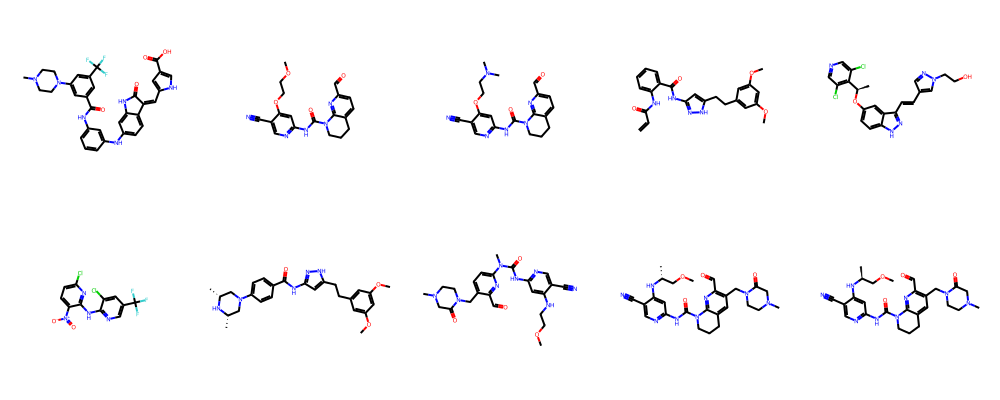

In [ ]:
mols = smiles[:10]
img = Draw.MolsToGridImage(mols, molsPerRow = 5, subImgSize = (200, 200))
img